In [128]:
# CSS formatting for the Notebook. Run to apply format
from IPython.core.display import HTML;      
HTML("""<link rel="stylesheet" href="./custom_two.css">""")

<div id=headerNotebook>
<h1 class=headtitle><b>Regression Algorithm - Airplane Delay prediction</b><br/>2017 Edition</h1>
<div class=date>05/04/2017</div>
<div class=authors><b>Authors</b>     Ole Andreas Hansen |
                            Alberto Ibarrondo Luis</div>
                            </div>

In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the use case of this notebook.
<div class="alert alert-danger">
**Note:** The source code in this lecture should be executed sequentially in the order.
</div>

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


<div class="alert alert-success">
IDEA! Check the airport size.
</div>

## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [129]:
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

from matplotlib.colors import ListedColormap

dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])
dark2_cmap=ListedColormap(dark2_colors)

<div class="alert alert-warning">
<b>COMMENT</b><br/>
Data from 1994 wilprobably be biased compared to those from other years. A better solution could be to uniformly sample the different years, and then use that data.
</div>

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

In [130]:
print("number of rows before cleaning:", raw_data.count())

number of rows before cleaning: 5180049


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

In [131]:
# extract the header
header = raw_data.first() # take(1) returns a list while first gives string

# replace invalid data with NULL and remove header
cleaned_data = (raw_data\
        # filter out the header
        .filter(lambda x: x != header)
        # replace the missing values with empty characters
        .map(lambda x: x.replace('NA', ''))
        )
        
print("number of rows after cleaning:", cleaned_data.count())

number of rows after cleaning: 5180048


## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [132]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [133]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

In [134]:
# create dataframe df
df = (sqlContext.createDataFrame(data=cleaned_data_to_columns, schema=airline_data_schema)
        .select(
        ['year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time',
         'scheduled_arrival_time', 'arrival_delay', 'distance', 'src_airport', 'dest_airport', 'carrier'
        ])
        .cache()
    )

## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

In [135]:
num_src_airport = df.select('src_airport').distinct().count()
num_dest_airport = df.select('dest_airport').distinct().count()
print("number of origin airports:", num_src_airport)
print("number of destination airports:", num_src_airport)

number of origin airports: 224
number of destination airports: 224


#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

In [136]:
num_carrier = df.select('carrier').distinct().count()
print("the number distinct carriers:", num_carrier)

the number distinct carriers: 10


#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>

In [137]:
print("the number of night flights:", df[df.scheduled_departure_time > 1800].count())

the number of night flights: 1078203


### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


,MonthName,num_flights
1,Jan,423861
11,Feb,386954
3,Mar,435516
6,Apr,420995
4,May,436432
2,Jun,426490
8,Jul,443736
7,Aug,451086
5,Sep,430861
9,Oct,449369


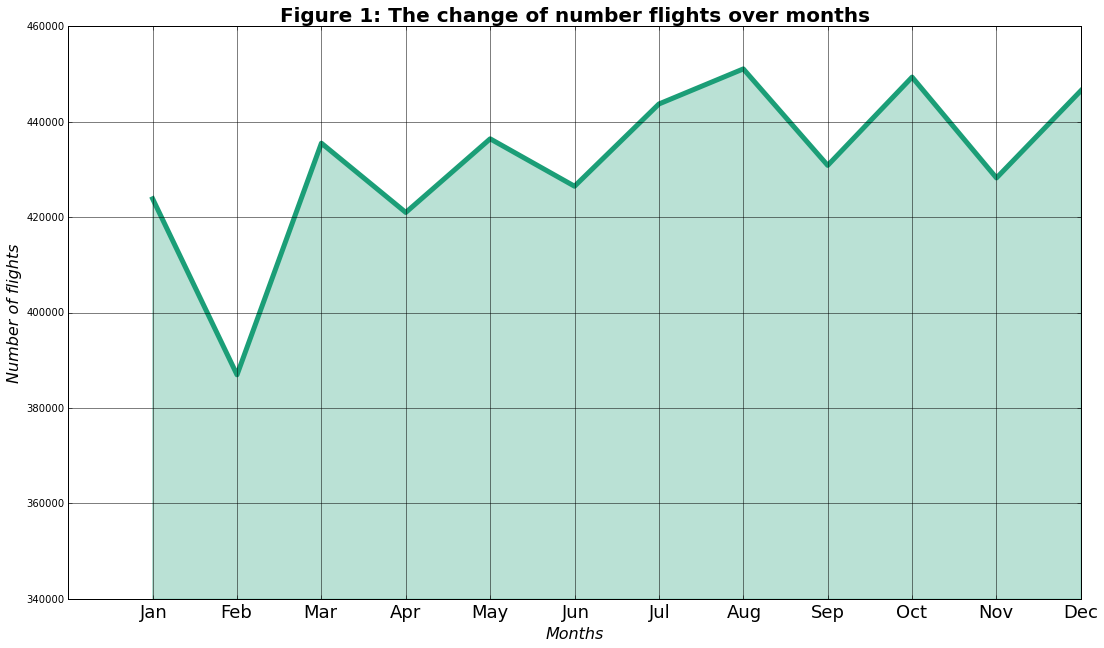

12

In [138]:
from IPython.display import display
statistic_month = df.groupBy('month').count().collect()

#statistic_day_of_week.show()
pdf = pd.DataFrame(data=statistic_month, columns=['month', 'num_flights'])
pdf = pdf.sort_values(['month'])
str_month = ['Jan','Feb','Mar','Apr','May','Jun',
                             'Jul','Aug','Sep', 'Oct', 'Nov','Dec']
pdf['MonthName']=pd.Series(str_month, pdf.index)
display(pdf[['MonthName', 'num_flights']])

#map_into_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',  5: 'May', 6: 'Jun',
                   #7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
#month_label = pdf['month'].map(lambda m: map_into_month[m])

#print(pdf.to_html())
plt.figure(figsize=(15, 9))
plt.xlabel("Months", fontsize=16, fontstyle='oblique')
plt.ylabel("Number of flights", fontsize=16, fontstyle='oblique')
plt.title('Figure 1: The change of number flights over months', fontsize=20, fontweight='semibold')
plt.grid(True,which="both",ls="-")

#plt.xticks(pdf['month'], month_label)
plt.tight_layout()
plt.plot(pdf['month'], pdf['num_flights'], color=dark2_colors[7], linewidth=5)
plt.fill_between(pdf['month'], pdf['num_flights'], 340000, color=dark2_colors[7], alpha=0.3)
plt.xticks(pdf['month'], str_month, fontsize=18)
plt.show()
len(pdf['month'])

<div class="alert alert-warning"> 
<b>COMMENT<br/></b>
We have found two key details from the graph: <br />
- Natural decrease in february due to less number of days<br />
- Could the gradual increase releate to vacations (summer), thanksgiving and christmas?<br />

</div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

,DayName,num_flights
0,Mon,754636
1,Sat,695245
2,Wed,756864
3,Fri,751531
4,Thu,751537
5,Sun,713703
6,Tue,756532


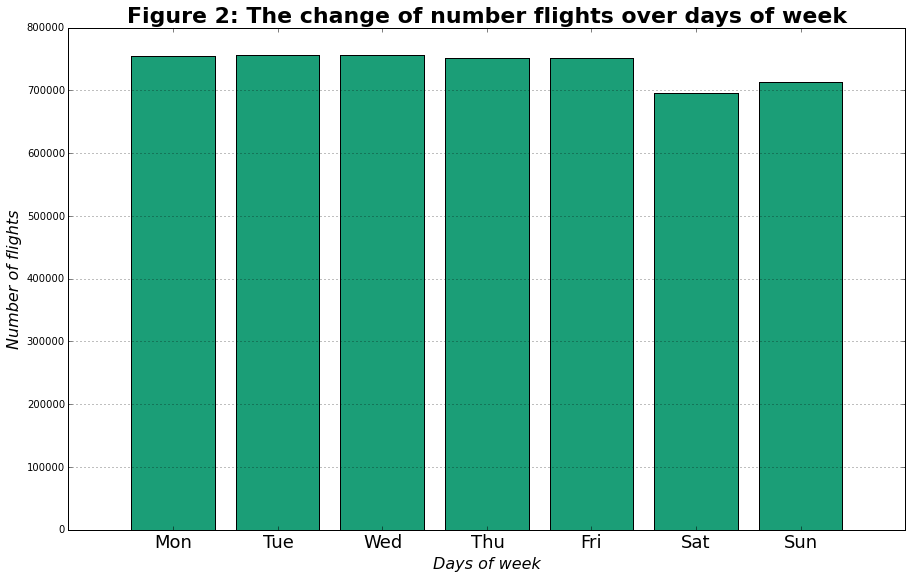

In [139]:
statistic_day_of_week = df.groupBy('day_of_week').count().collect()
#statistic_day_of_week.show()
pdf = pd.DataFrame(data=statistic_day_of_week, columns=['day_of_week', 'num_flights'])
#pdf = pdf.sort_values(['day_of_week'])
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf['day_of_week'].map(lambda i: map_int_into_day[i])
pdf['DayName']=pd.Series(day_of_week_label, pdf.index)
display(pdf[['DayName', 'num_flights']])

plt.figure(figsize=(15, 9))
plt.xlabel("Days of week", fontsize=16, fontstyle='oblique')
plt.ylabel("Number of flights", fontsize=16, fontstyle='oblique')
plt.title('Figure 2: The change of number flights over days of week', fontsize=22, fontweight='bold')
plt.grid(True, axis='y',ls=":")


# plot bar chart
plt.bar(pdf['day_of_week'], pdf['num_flights'], color=dark2_colors[0], align='center')

plt.xticks(pdf['day_of_week'], day_of_week_label, fontsize=18)
plt.show()

<div class="alert alert-warning"> 

<b>COMMENT<br/></b>
- Decrease during the week-end, possibly due to less workers taking flights <br />
- Mon-Fri values are stable and almost the same<br />

</div>

#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

,day_of_month,num_flights
6,1,169674
28,2,169829
10,3,168678
17,4,169399
12,5,168423
8,6,170650
20,7,172210
18,8,170674
16,9,170077
21,10,170252


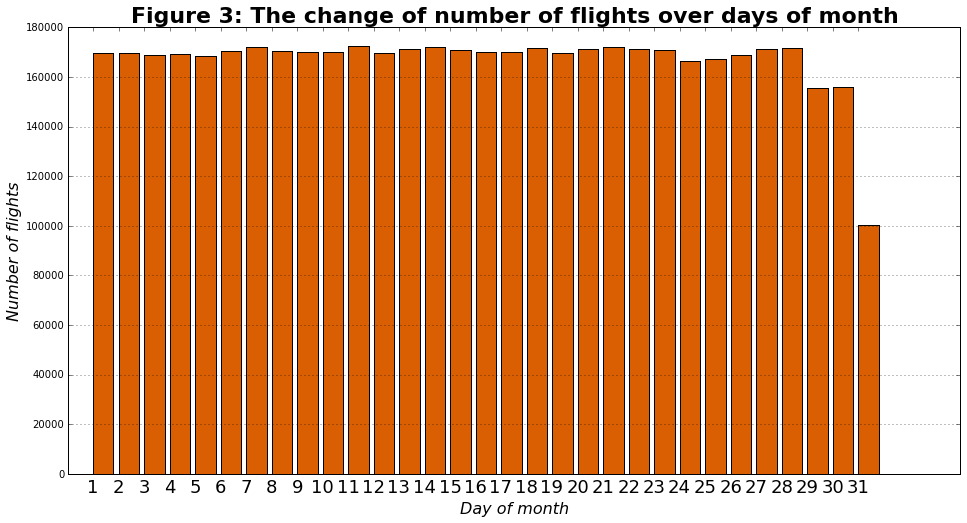

In [140]:
statistic_day_of_month = df.groupBy('day_of_month').count().collect()

pdf = pd.DataFrame(data=statistic_day_of_month, columns=['day_of_month', 'num_flights'])
pdf = pdf.sort_values(['day_of_month'])
display(pdf)

# plot
plt.figure(figsize=(16, 8))
plt.xlabel("Day of month", fontsize=16, fontstyle='oblique')
plt.ylabel("Number of flights", fontsize=16, fontstyle='oblique')
plt.title("Figure 3: The change of number of flights over days of month", fontsize=22, fontweight='bold')
plt.grid(True, axis='y', ls=':')

plt.bar(pdf['day_of_month'], pdf['num_flights'], color=dark2_colors[8])
plt.xticks(pdf['day_of_month'], fontsize=18)
plt.show()

<div class="alert alert-warning"> 

<b>COMMENT<br/></b>
- Natural decrease on the last three days (29, 30, 31) due to variations in number of days in a month<br />

</div>

,dep_time,num_flights
count,1162.000000,1162.000000
mean,1327.987091,4457.872633
std,608.839024,8878.256034
min,1.000000,1.000000
25%,852.250000,629.000000
50%,1342.500000,1133.000000
75%,1832.750000,2051.750000
max,2400.000000,115656.000000


None


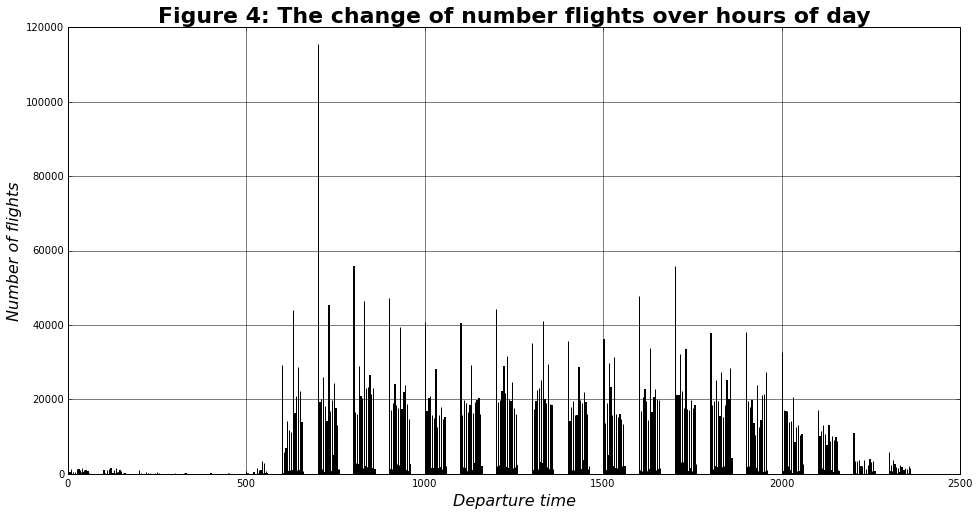

In [141]:
statistic_hour_of_day = df.groupBy('scheduled_departure_time').count().collect()
#statistic_hour_of_day.show()
pdf = pd.DataFrame(data=statistic_hour_of_day, columns=['dep_time', 'num_flights'])
pdf = pdf.sort_values(['dep_time'])
print(display(pdf.describe()))

#plot char chart
plt.figure(figsize=(16, 8))
plt.xlabel('Departure time', fontsize=16, fontstyle='oblique')
plt.ylabel('Number of flights', fontsize=16, fontstyle='oblique')
plt.title('Figure 4: The change of number flights over hours of day', fontsize=22, fontweight='bold')
plt.grid(True, which='both', ls='-')
plt.bar(pdf['dep_time'], pdf['num_flights'])
plt.show()

<div class="alert alert-warning">
<b>COMMENT<br/></b>
Night airplane traffic is considerably reduced in comparison to the rest of the traffic.
<br/>
Traffic starts at 6AM and drops drastically at 10PM.<br/>
Biggest peaks are at 7AM (early morning flights, beginning of work shift) and 5PM (probably fue to daily flights returning home)</div>

#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights?
</div>

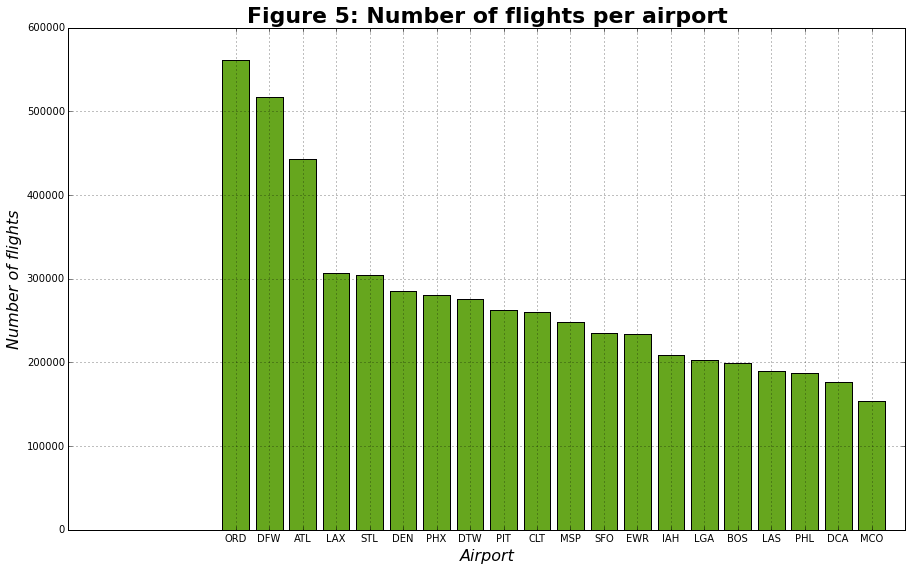

In [142]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
             .groupBy(df.dest_airport)
             .agg(func.count('*').alias('count2'))
            )

#print(stat_src.take(10))
#print(stat_dest.take(10))
# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, stat_src.src_airport == stat_dest.dest_airport, how='inner')

# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            # select top airpoint in termns of number of flights
                            .select(['dest_airport', 'total']).orderBy(desc('total'))
                        )
#display(stat_airport_traffic.show())

pdf = pd.DataFrame(data=stat_airport_traffic.take(20), columns=['dest_airport', 'total'])
bins = range(0, len(pdf['total']))
plt.figure(figsize=(15, 9))
plt.xlabel('Airport', fontsize=16, fontstyle='oblique')
plt.ylabel('Number of flights', fontsize=16, fontstyle='oblique')
plt.title('Figure 5: Number of flights per airport', fontsize=22, fontweight='bold')
plt.grid(True, which='both')
plt.bar(bins, pdf['total'], align='center', color=dark2_colors[11])
plt.xticks(bins, pdf['dest_airport'])
plt.show()

#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>


In [143]:
stat_carrier = (df
                .groupBy(df.carrier)
                .agg(func.count('*').alias('count'))
                .orderBy(desc('count'))
                )

display(pd.DataFrame(stat_carrier.take(20), columns=['carrier', 'count']))

,carrier,count
0,DL,874526
1,US,857906
2,AA,722277
3,UA,638750
4,WN,565426
5,CO,484834
6,NW,482798
7,TW,258205
8,HP,177851
9,AS,117475


### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

In [144]:
# 'year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time',
# 'scheduled_arrival_time', 'arrival_delay', 'distance', 'src_airport', 'dest_airport', 'carrier'

# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0))

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy(['year', 'hour'])

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
            delay_ratio_per_hour
                .orderBy('hour')
                .select(['hour', 'delay_ratio'])
    )

pdf_delay_ratio_per_hour = pd.DataFrame(data=delay_ratio_per_hour.collect(), columns=['hour', 'delay_ratio'])

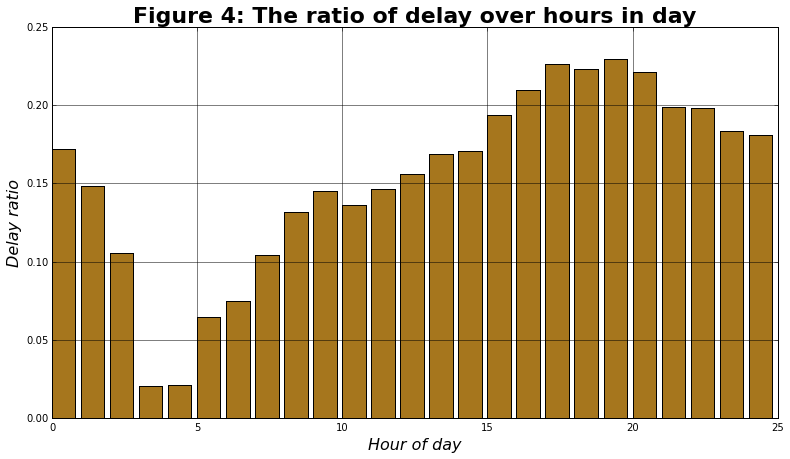

In [145]:

# plot a bar chart

plt.figure(figsize=(13, 7))
plt.grid(True, which='both', ls='-')
plt.xlabel('Hour of day', fontsize=16, fontstyle='oblique')
plt.ylabel('Delay ratio', fontsize=16, fontstyle='oblique')

plt.title('Figure 4: The ratio of delay over hours in day', fontsize=22, fontweight='bold')
plt.bar(pdf_delay_ratio_per_hour['hour'], pdf_delay_ratio_per_hour['delay_ratio'], color=dark2_colors[13])
plt.show()


<div class="alert alert-warning">
<b>COMMENT<br/></b>
There is celarly a valley period during the night where the delays decrease considerably. <br/>
Starting from 5AM (which is the hour when the number of flights starts increasing, from section 4.3) 
 the ratio increases constantly, to peak in the late afternoon, between 18h and 20h</div>

#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

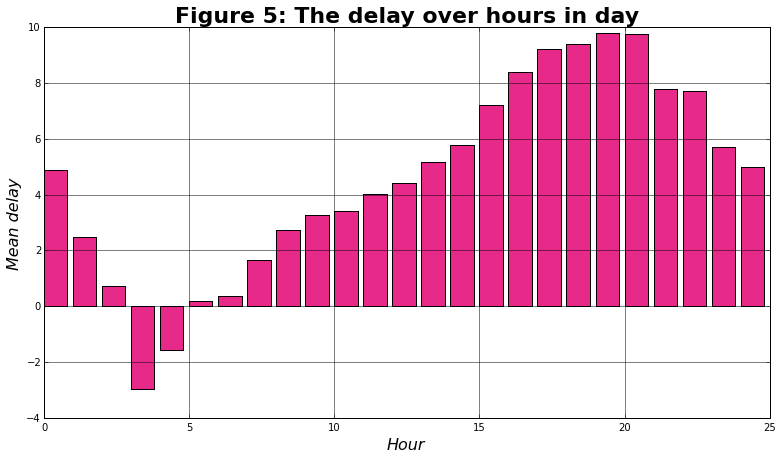

In [146]:
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy('hour')
        .select(['hour','mean_delay'])
    )
    
pdf_mean_delay_per_hour = pd.DataFrame(data=mean_delay_per_hour.collect(), columns=['hour', 'mean_delay'])

plt.figure(figsize=(13, 7))
plt.grid(True, which='both', ls='-')
plt.xlabel('Hour', fontsize=16, fontstyle='oblique')
plt.ylabel('Mean delay', fontsize=16, fontstyle='oblique')
plt.title('Figure 5: The delay over hours in day', fontsize=22, fontweight='bold')
plt.bar(pdf_mean_delay_per_hour['hour'], pdf_mean_delay_per_hour['mean_delay'], color=dark2_colors[3])
plt.show()

<div class="alert alert-warning">
<b>COMMENT<br/></b>
It remains highly correlated to the figure above.<br/>
Between 3AM and 4AM there is a period when flights tend to be early on arrival.</div>

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

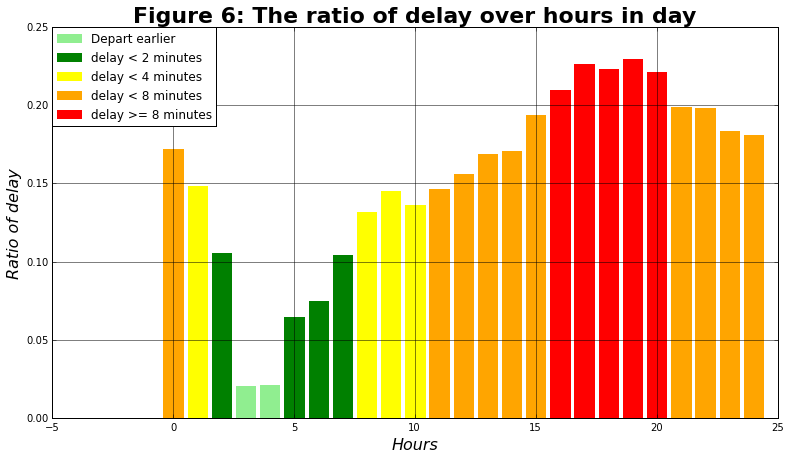

In [147]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())

plt.figure(figsize=(13, 7))
plt.xlabel("Hours", fontsize=16, fontstyle='oblique')
plt.ylabel("Ratio of delay", fontsize=16, fontstyle='oblique')
plt.title('Figure 6: The ratio of delay over hours in day', fontsize=22, fontweight='bold')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour['hour'], pdf_delay_ratio_per_hour['delay_ratio'], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour['mean_delay'][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour['mean_delay'][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour['mean_delay'][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour['mean_delay'][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5],  loc='left',
           borderaxespad=0.)

plt.show()

<div class="alert alert-warning">
<b>COMMENT</b><br/>
This figure directly corrrelates with the previous figures: the hours of the highest delay ratio are also the hours with the biggest delay period.<br />
Here we can perfectly separate all the hours into several ranges of delays: <br />
<ul>
    <li><b>Green:</b> Is present during night hours from 2am to 7am</li>
    <li><b>Yellow:</b> Late night at 1am and early morning from 8am to 10am</li>
    <li><b>Orange:</b> Around mid day 11am to 3pm and around early night from 9pm to 12pm </li>
    <li><b>Red:</b> Late afternoon between 4pm and 8 pm.</li>
</ul>
</div>

In the new figure (Figure 6), we have more information in a single plot. The flights in 3AM to 4AM have very low probability of being delayed, and actually depart earlier than their schedule. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed: in more than 50% of the cases, the delay is 8 minutes or more.

This example shows us that the way representing results are also important.


<div class='alert alert-warning'>
<h4>Flight delay distribution:</h4>
We would also like to see how the distribution of delayed flights are over all. How many delays are short, and how many are long?
</div>

In [148]:
pdArrivDelay = pd.DataFrame(df.select(['arrival_delay', ]).collect(), columns=['Delay'])

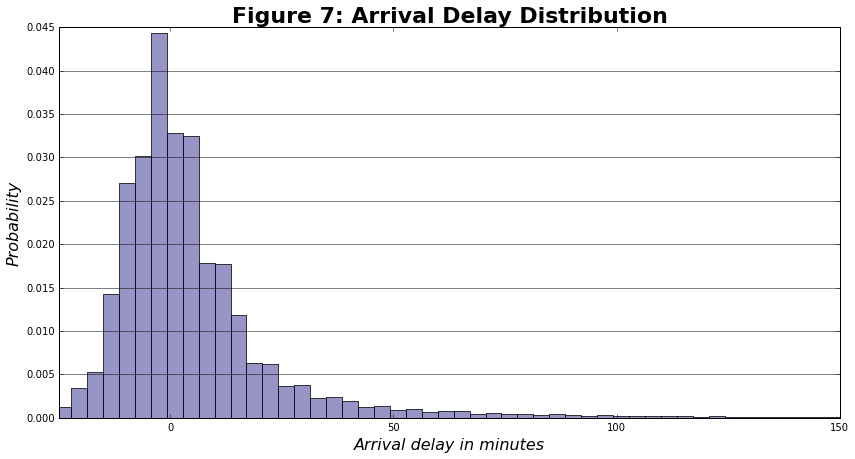

In [149]:
# Plot The distribution of flight delays
plt.figure(figsize=(14, 7))
plt.xlabel("Arrival delay in minutes", fontsize=16, fontstyle='oblique')
plt.ylabel("Probability", fontsize=16, fontstyle='oblique')
plt.title('Figure 7: Arrival Delay Distribution', fontsize=22, fontweight='bold')
plt.grid(True, axis='y',ls="-")
plt.hist(pdArrivDelay.Delay.dropna(), bins=400, normed=1, alpha=0.75, color=dark2_colors[2])
plt.xlim(-25,150)
plt.show()

<div class='alert alert-warning'>
<b>COMENT</b><br/>
Surprisingly enough, the distribution on the average delay follows what appears to be a <b>Poisson distribution</b>, a well known distribution from Network Modelling that describes arrival rates in Markov processes. From this apparently accidental fact we can infer that plane arrivals behave like independent stochastic processes. We think that this can only be said about the wider picture, since looking at individual plane flights would reveal a correlation with planes taking off/landing at adjacent times.<br/><br/>
Sources: http://statistics.wikidot.com/ch6  |  https://www.netlab.tkk.fi/opetus/s383143/kalvot/E_poisson.pdf
</div>

#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

,day_of_month,delay_ratio
count,31.000000,31.000000
mean,16.000000,0.169824
std,9.092121,0.017973
min,1.000000,0.141680
25%,8.500000,0.158178
50%,16.000000,0.169033
75%,23.500000,0.176646
max,31.000000,0.219627


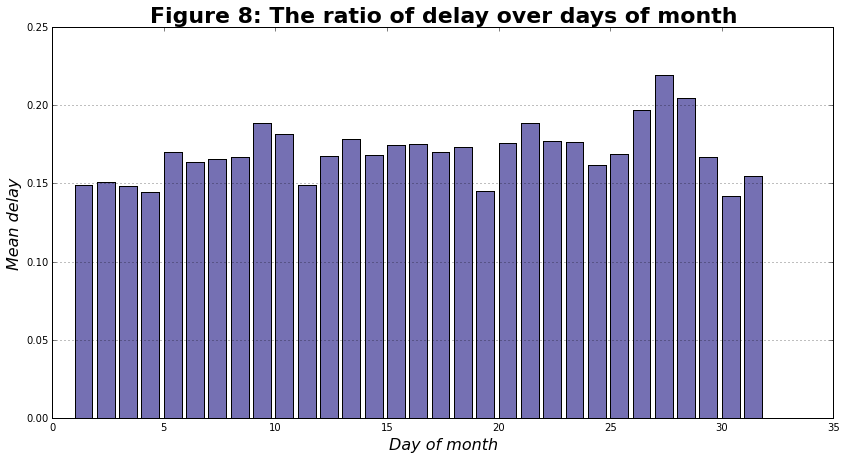

In [150]:
####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
statistic_day_of_month = (
    df_with_delay
        .groupBy('day_of_month')
        # is_dealy is either 0 or 1
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        # order by day_of_month
        .orderBy('day_of_month')
    )
    
# collect data and plot
pdf_day_of_month = pd.DataFrame(data=statistic_day_of_month.collect(), columns=['day_of_month', 'delay_ratio'])

display(pdf_day_of_month.describe())

plt.figure(figsize=(14, 7))
plt.xlabel("Day of month", fontsize=16, fontstyle='oblique')
plt.ylabel("Mean delay", fontsize=16, fontstyle='oblique')
plt.title('Figure 8: The ratio of delay over days of month', fontsize=22, fontweight='bold')
plt.grid(True, axis='y',ls=":")
plt.bar(pdf_day_of_month['day_of_month'], pdf_day_of_month['delay_ratio'], color=dark2_colors[9])
plt.show()



<div class="alert alert-warning"> 
<b>COMMENT</b><br/>
From the figure we can identify 3 local minimums on the 4th, 11th and the 19th. Looking at the calendar for 1994 we see that these days were often placed on a weekday where the delay ratio is low (figure below) from saturday to tuesday. This is due to the different periodicity of the weeks with relation to the months/years. We disgard the dates after the 28th due to the different anomalies shown in <b>figure 3</b>: number of flights per day.
</div>

#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

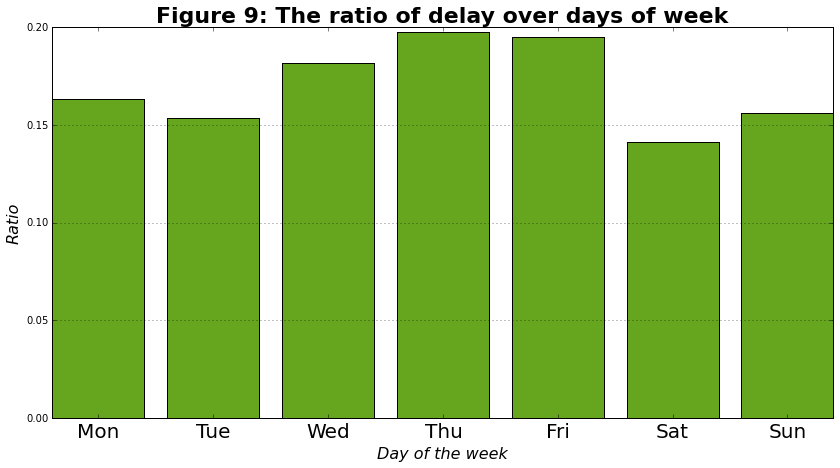

In [151]:

####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
    df_with_delay
        .groupBy('day_of_week')
        .agg(func.sum('is_delay')/func.count('*')).alias('delay_ratio')
        # order by day_of_month
        .orderBy('day_of_week')
    )
    
# collect data and plot
pdf_day_of_week = pd.DataFrame(data=statistic_day_of_week.collect(), columns=['day_of_week', 'ratio'])
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week['day_of_week'].map(lambda i: map_int_into_day[i])


plt.figure(figsize=(14, 7))
plt.xlabel("Day of the week", fontsize=16, fontstyle='oblique')
plt.ylabel("Ratio", fontsize=16, fontstyle='oblique')
plt.title('Figure 9: The ratio of delay over days of week', fontsize=22, fontweight='bold')
plt.grid(True, axis='y',ls=":")
plt.xticks(pdf_day_of_week['day_of_week'], day_of_week_label, fontsize = 20)
plt.bar(pdf_day_of_week['day_of_week'], pdf_day_of_week['ratio'], align='center', color=dark2_colors[11])
plt.show()


<div class="alert alert-warning">
<b>COMMENT</b><br/>
During the weekends we observe that there are less chances to get a delayed flight. This relates to the total amount of traffic during thw weekend. Since there is less traffic overall, the chances of being delayed due to unavailable runways are smaller</div>

#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

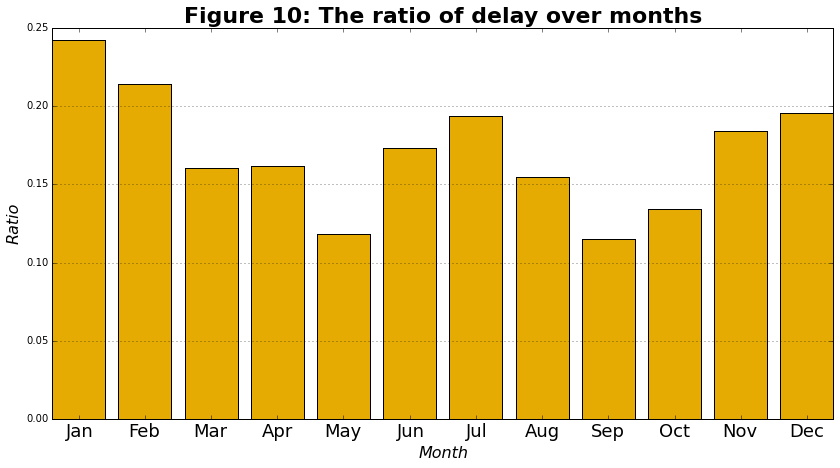

In [152]:

####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    df_with_delay.groupBy('month').agg(func.sum('is_delay')/func.count('*').alias('delay_ratio'))
    )
    
# collect data and plot
pdf_month = pd.DataFrame(data=statistic_month.collect(), columns=['month', 'ratio'])
map_into_month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',  5: 'May', 6: 'Jun',
                  7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
month_label = pdf_month['month'].map(lambda m: map_into_month[m])


plt.figure(figsize=(14, 7))
plt.xlabel("Month", fontsize=16, fontstyle='oblique')
plt.ylabel("Ratio", fontsize=16, fontstyle='oblique')
plt.title('Figure 10: The ratio of delay over months', fontsize=22, fontweight='bold')
plt.grid(True, axis='y',ls=":")
plt.xticks(pdf_month['month'], month_label, fontsize=18)
plt.bar(pdf_month['month'], pdf_month['ratio'], align='center', color=dark2_colors[12])
plt.show()


<div class="alert alert-warning">
<b>COMMENT</b><br/>
The plot shows certain seasonality, with local maximum in January (Christmas) and July (Summer vacations).<br/>
One possible explanation to the peak arround January could be the weather. Bad weather conditions during winter do generally affect netagively to the plane delays, which is why January doubles the ratio from May.</div>

We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights:

- The probability for a flight to be delayed is low at the beginning or at the very end of a given months
- Flights on two first weekdays and on the weekend, are less likely to be delayed
- May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)

Putting things together, we can have a global picture of the whole year!

In [153]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect(), columns=
                   ['year','month', 'day_of_month', 'day_of_week', 'delayRatio'])
pdf.describe()

,year,month,day_of_month,day_of_week,delayRatio
count,365,365.000000,365.000000,365.000000,365.000000
mean,1994,6.526027,15.720548,4.005479,0.169894
std,0,3.452584,8.808321,2.002738,0.075968
min,1994,1.000000,1.000000,1.000000,0.029605
25%,1994,4.000000,8.000000,2.000000,0.108375
50%,1994,7.000000,16.000000,4.000000,0.155041
75%,1994,10.000000,23.000000,6.000000,0.216959
max,1994,12.000000,31.000000,7.000000,0.430963


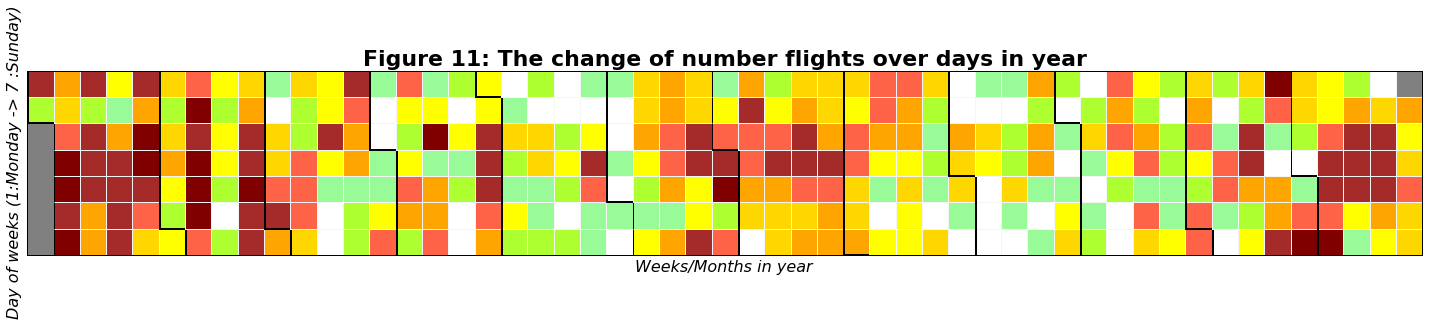

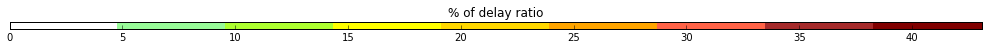

In [154]:
fig = plt.figure(figsize=(25,14))

plt.xlabel("Weeks/Months in year", fontsize=16, fontstyle='oblique')
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)", fontsize=16, fontstyle='oblique')
plt.title('Figure 11: The change of number flights over days in year', fontsize=22, fontweight='bold')
ax = fig.add_subplot(1,1,1)     
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf.year)
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf.year[i]
    month = pdf.month[i]
    day_of_month = pdf.day_of_month[i]
    day_of_week = pdf.day_of_week[i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    cMap = ListedColormap(['white', 'palegreen', 'greenyellow', 'yellow','gold', 'orange', 'tomato', 'brown', 'maroon'])
    if pdf.delayRatio[i] <= 0.086802:
        color = 'white'
    elif pdf.delayRatio[i] <= 0.106950:
        color = 'palegreen'
    elif pdf.delayRatio[i] <= 0.130625:
        color = 'greenyellow'
    elif pdf.delayRatio[i] <= 0.152415:
        color = 'yellow'
    elif pdf.delayRatio[i] <= 0.180998:
        color = 'gold'
    elif pdf.delayRatio[i] <= 0.210556:
        color = 'orange'
    elif pdf.delayRatio[i] <= 0.246090:
        color = 'tomato'
    elif pdf.delayRatio[i] <= 0.315542:
        color = 'brown'
    else:
        color = 'maroon'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

plt.show()

fig = plt.figure(figsize=(15, 1))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.1])
norm = mpl.colors.Normalize(vmin=0, vmax=43.0963)
plt.title('% of delay ratio')
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cMap,
                                norm=norm,
                                orientation='horizontal')

#### Question 5.6
<div class="alert alert-info">
Explain figure 10.
</div>

<div class="alert alert-warning"> <b>COMMENT</b><br/>
The figure summarizes and supports several earlier plots. With a single plot we are able to categorize each day in the year by the % of delay ratio, shown in different colours in a scale. From this we can identify peaks of delay, related to high7low seasons. Mid-winter and mid-summer are the two densest periods in the year, while May and September are very low. 
We can already state that bad weather during winter season does affect negatively to the airplane delays. It turns out that also <a href='http://www.businessinsider.com/why-planes-cant-fly-in-extreme-heat-2013-7?IR=T'>hot weather during summer season increases delay chances</a>
</div>

#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

In [155]:
# Importing Airport names
airportInfo = pd.read_csv("support/airports.csv")
display(airportInfo[:10])
airportNames = airportInfo.drop(['lat', 'long', 'country', 'state', 'airport'],1)
display(airportNames[:10])

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
5,01M,Tishomingo County,Belmont,MS,USA,34.491667,-88.201111
6,02A,Gragg-Wade,Clanton,AL,USA,32.850487,-86.611453
7,02C,Capitol,Brookfield,WI,USA,43.087510,-88.177869
8,02G,Columbiana County,East Liverpool,OH,USA,40.673313,-80.641406
9,03D,Memphis Memorial,Memphis,MO,USA,40.447259,-92.226961


,iata,city
0,00M,Bay Springs
1,00R,Livingston
2,00V,Colorado Springs
3,01G,Perry
4,01J,Hilliard
5,01M,Belmont
6,02A,Clanton
7,02C,Brookfield
8,02G,East Liverpool
9,03D,Memphis


In [156]:
####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter(df_with_delay.src_airport.isin(top_20_airports))
        # group by source airport
        .groupBy('src_airport')
        #  calculate the delay ratio
        .agg(func.sum('is_delay')/func.count('*').alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['src_airport'])
    )

top_20_airportsPD = pd.DataFrame(statistic_ratio_delay_airport.take(20), columns=['src_airport', 'delay_ratio'])
top_20_airportsRenamed = pd.merge(top_20_airportsPD, airportNames, left_on='src_airport', right_on='iata', how='inner')

display(top_20_airportsRenamed.drop('iata', 1))

,src_airport,delay_ratio,city
0,ATL,0.212054,Atlanta
1,BOS,0.203378,Boston
2,CLT,0.222512,Charlotte
3,DCA,0.159986,Arlington
4,DEN,0.203547,Denver
5,DFW,0.225247,Dallas-Fort Worth
6,DTW,0.170692,Detroit
7,EWR,0.264396,Newark
8,IAH,0.166017,Houston
9,LAS,0.172188,Las Vegas


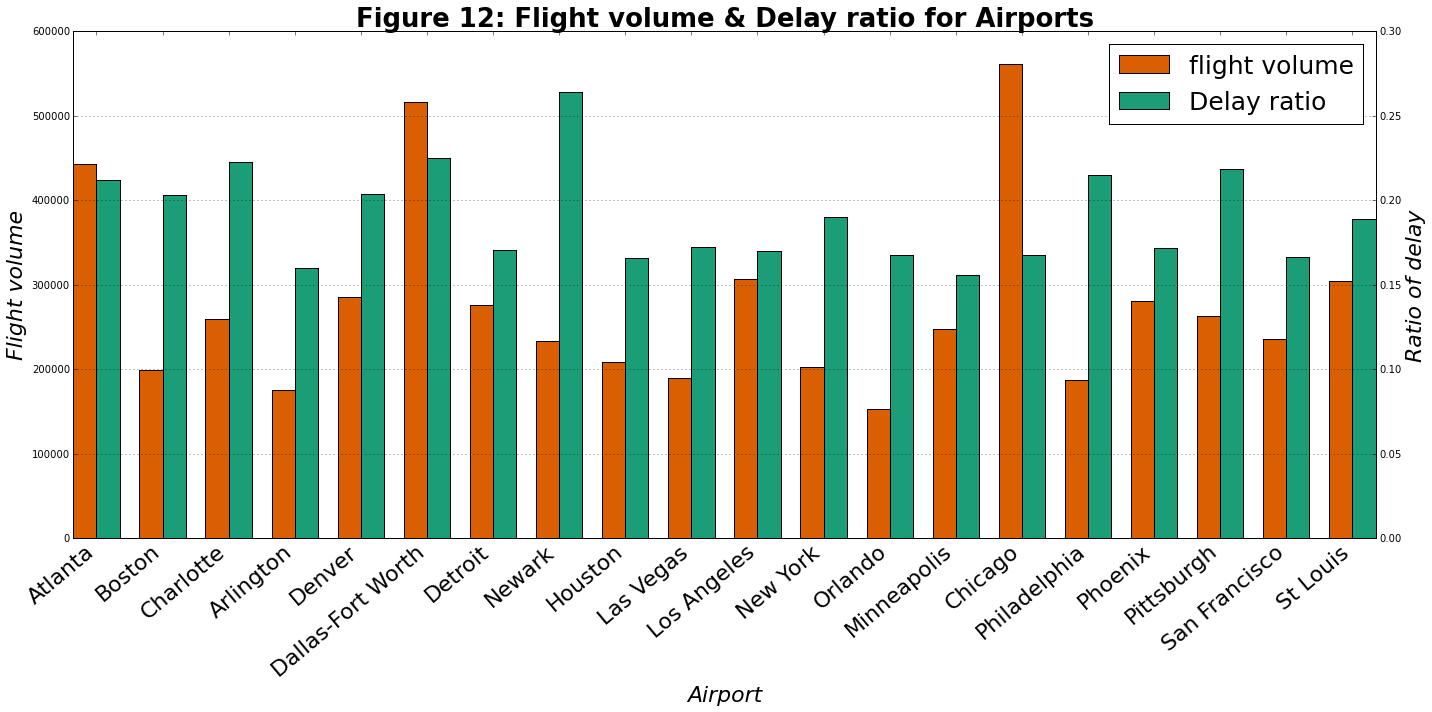

In [157]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.take(K), columns=['src_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by='src_airport')
#print(pdf_top_20_airport_volume)
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport", fontsize=22, fontstyle='oblique')
ax.set_ylabel("Flight volume", fontsize=22, fontstyle='oblique')
ax2.set_ylabel("Ratio of delay", fontsize=22, fontstyle='oblique')
plt.xticks(index + bar_width, top_20_airportsRenamed.city)
plt.setp(ax.get_xticklabels(), rotation=40, fontsize=22, ha='right')

plt.title('Figure 12: Flight volume & Delay ratio for Airports', fontsize=26, fontweight='bold')
plt.grid(True, axis='y',ls=":")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color=dark2_colors[1], 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color=dark2_colors[7], 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, prop={'size':25})

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
<b>COMMENT</b><br/>
There is no visible correlation between the flight volumne in an airport and the delay ratio.
</div>

#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?  
Comment the figure!
</div>

In [158]:
K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
        # select only flights that belong from one of top 20 carriers
        .filter(df_with_delay.carrier.isin(top_20_carriers))
        # group by carriers
        .groupBy('carrier')
        #  calculate the delay ratio
        .agg(func.sum('is_delay')/func.count('*').alias('delay_ratio'))
        # sort by name of airport
        .orderBy(['carrier'])
    )

top_20_carriers_delay = pd.DataFrame(statistic_ratio_delay_carrier.take(20), columns=['carrier', 'delay_ratio'])
display(top_20_carriers_delay)

,carrier,delay_ratio
0,AA,0.175244
1,AS,0.159642
2,CO,0.195558
3,DL,0.183284
4,HP,0.186251
5,NW,0.129481
6,TW,0.182123
7,UA,0.168653
8,US,0.184223
9,WN,0.128298


In [159]:
# Importing Carrier names
carrierInfo = pd.read_csv("support/carriers.csv")

carrierInfo.Description = carrierInfo.Description.map(lambda x:x.split(',')[0])
carrierInfo.Description = carrierInfo.Description.map(lambda x:x.split('.')[0])
display(carrierInfo[:10])

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,Comlux Aviation
3,06Q,Master Top Linhas Aereas Ltd
4,07Q,Flair Airlines Ltd
5,09Q,Swift Air
6,0BQ,DCA
7,0CQ,ACM AIR CHARTER GmbH
8,0FQ,Maine Aviation Aircraft Charter
9,0GQ,Inter Island Airways


In [160]:
# collect data and translate names
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_carrier.take(20), columns=['carrier', 'count'])
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by='carrier')
pdf_top_20_carrier_volume = pd.merge(pdf_top_20_carrier_volume, carrierInfo, left_on='carrier', right_on='Code')
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.drop(['Code'],1)
display(pdf_top_20_carrier_volume)

,carrier,count,Description
0,AA,722277,American Airlines Inc
1,AS,117475,Alaska Airlines Inc
2,CO,484834,Continental Air Lines Inc
3,DL,874526,Delta Air Lines Inc
4,HP,177851,America West Airlines Inc
5,NW,482798,Northwest Airlines Inc
6,TW,258205,Trans World Airways LLC
7,UA,638750,United Air Lines Inc
8,US,857906,US Airways Inc
9,WN,565426,Southwest Airlines Co


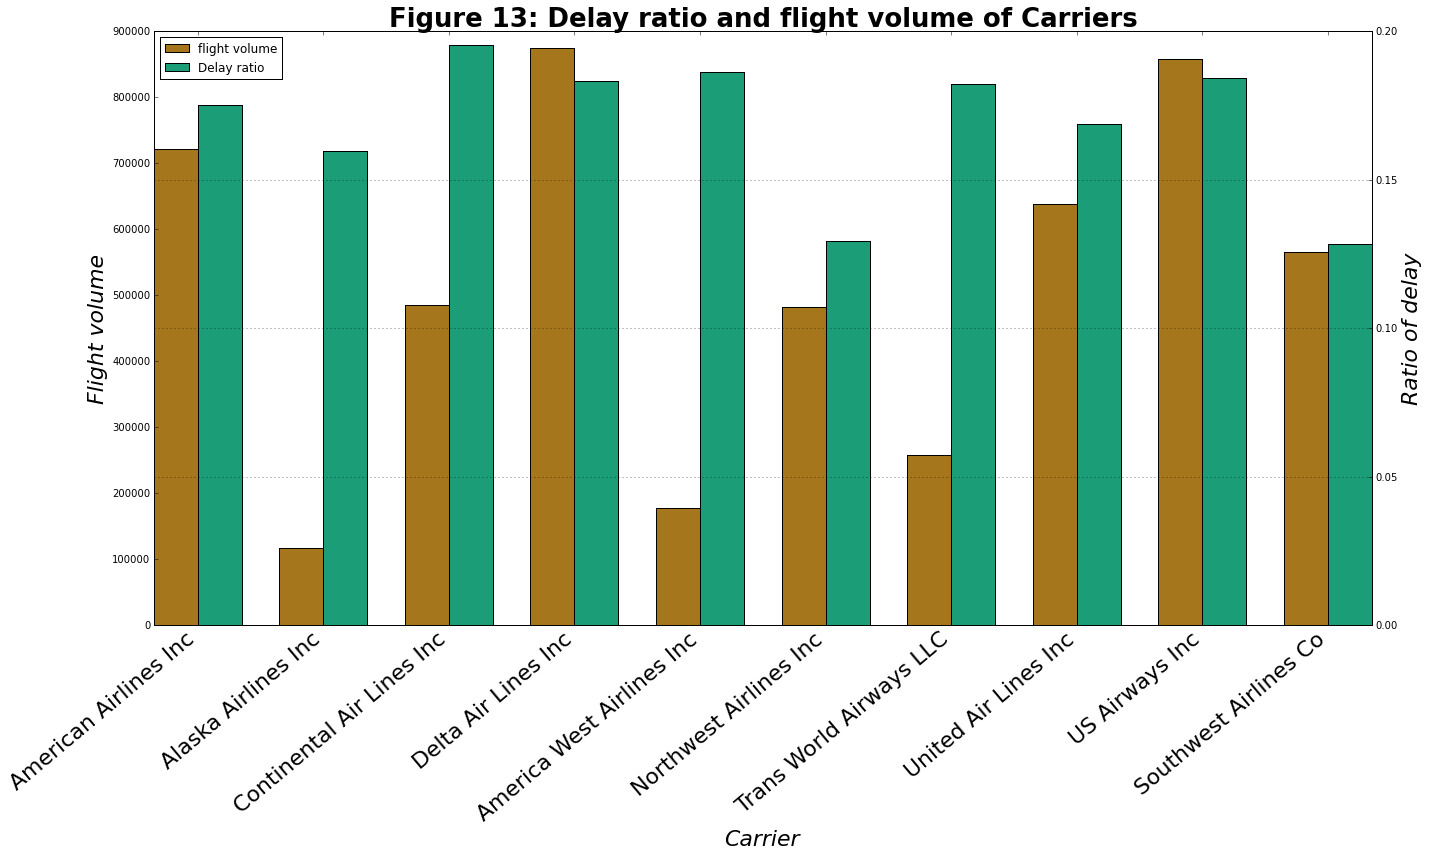

In [161]:
# Plot top 20 carriers
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,12))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier", fontsize=22, fontstyle='oblique')
ax.set_ylabel("Flight volume", fontsize=22, fontstyle='oblique')
ax2.set_ylabel("Ratio of delay", fontsize=22, fontstyle='oblique')
plt.xticks(index + bar_width, pdf_top_20_carrier_volume.Description)
plt.setp(ax.get_xticklabels(), rotation=40, fontsize=22, ha='right')

plt.title('Figure 13: Delay ratio and flight volume of Carriers', fontsize=26, fontweight='bold')
plt.grid(True,which="both",ls=":")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color=dark2_colors[6], 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color=dark2_colors[7], 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div class="alert alert-warning">
<b>COMMENT</b><br/>
Once again, there is no visible correlation. The flight volume doesn't impact the delay ratio for Carriers.
<br/><i>In summary, it's safe to assume that the delay ratio is neither affected by Carrier nor by Airport.</i>
</div>

# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

In [162]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy('src_airport')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

# test the dictionary
print('Index of most popular SOURCE airport (ORD, matches data from figure 5): ', map_src_airport_to_index['ORD'])
print('Index of 3rd most SOURCE popular irport (ATL): ', map_src_airport_to_index['ATL'])
#print(map_src_airport_to_index)


Index of most popular SOURCE airport (ORD, matches data from figure 5):  0
Index of 3rd most SOURCE popular irport (ATL):  2


#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [163]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df
        .groupBy('dest_airport')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
num_dest_airports_idx = range(0, num_dest_airport)
map_dest_airports_to_index = dict(zip(dest_airports, num_dest_airports_idx))

# test the dictionary
print('Index of most popular DESTINATION airport (ORD, matches data from figure 5): ', map_dest_airports_to_index['ORD'])
print('Index of 3rd most DESTINATION popular irport (ATL): ', map_dest_airports_to_index['ATL'])
#print(map_dest_airports_to_index)

Index of most popular DESTINATION airport (ORD, matches data from figure 5):  0
Index of 3rd most DESTINATION popular irport (ATL):  2


#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [164]:

stat_carrier = (
    df
        .groupBy('carrier')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    
)

# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top
carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
map_carriers_to_index = dict(zip(carriers, range(0, num_carrier)))

print(map_carriers_to_index)


{'US': 1, 'NW': 6, 'CO': 5, 'AS': 9, 'DL': 0, 'HP': 8, 'AA': 2, 'TW': 7, 'UA': 3, 'WN': 4}


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [165]:
def most_common(groupBy):
    return (df
            .groupBy(groupBy)
            .agg(func.count('*').alias('count'))
            .orderBy(desc('count'))
           ).first()[0]


the_most_common_month = most_common('month')

print("The most common month:", the_most_common_month)


The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [166]:
the_most_common_day_of_month = most_common('day_of_month')
the_most_common_day_of_week = most_common('day_of_week')

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [167]:
the_most_common_s_departure_time = most_common('scheduled_departure_time')
the_most_common_s_arrival_time = most_common('scheduled_arrival_time')

print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [168]:

# calculate mean distance
mean_distance = df.agg(func.mean('distance')).first()[0]
print("mean distance:", mean_distance)

mean distance: 670.7402911985982


#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [169]:
# calculate mean arrival delay
mean_arrival_delay = df.agg(func.mean('arrival_delay')).first()[0]
print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

In [57]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                                      
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                    else map_src_airport_to_index[src_airports[0]], # src_airport
                                                  
                map_dest_airports_to_index[values[17]] if is_valid(values[17]) \
                    else map_dest_airports_to_index[dest_airports[0]], # destination_airport
                                      
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

trainingData = trainingData.cache()
testData = testData.cache()


In [58]:
trainingData.take(10)

[LabeledPoint(-9.0, [1994.0,1.0,7.0,5.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(20.0, [1994.0,1.0,10.0,1.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(88.0, [1994.0,1.0,11.0,2.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(21.0, [1994.0,1.0,12.0,3.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(2.0, [1994.0,1.0,14.0,5.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(1.0, [1994.0,1.0,15.0,6.0,900.0,1003.0,1.0,9.0,55.0,290.0,1.0]),
 LabeledPoint(-4.0, [1994.0,1.0,18.0,2.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(-2.0, [1994.0,1.0,22.0,6.0,900.0,1003.0,1.0,9.0,55.0,290.0,1.0]),
 LabeledPoint(-11.0, [1994.0,1.0,25.0,2.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0]),
 LabeledPoint(5.0, [1994.0,1.0,27.0,4.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0])]

## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


In [59]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports , 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

In [61]:
print('Model Number of Nodes: ', model.numNodes())
print('Model Depth: ', model.depth())

Model Number of Nodes:  8035
Model Depth:  12


## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

In [62]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

testMSE = labelsAndPredictions.map(
    lambda p: np.power(p[0] - p[1], 2)).mean()
print('Test Mean Squared Error = ' + str(testMSE))
print('Test RMSE = ' + str(np.sqrt(testMSE)))


Test Mean Squared Error = 491.455598284
Test RMSE = 22.1687978538


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<div class="alert alert-warning">
<b>COMMENT</b><br/>
When computing the root of the MSE (thus obtaining the RMSE), we obtain a metric of the average error in classification. The mean error is 22 minutes, which is considerably large given the delay distribution (figure 7).<br/><br/>
We can infer that our model is not precise enough.<br/><br/>
The MSE is a good measurement of a model, since for unbiased models it directly relates to the variance of the model (and the RMSE would relate to the standard deviation). An error of 0 would mean perfect accuracy, and MSE errors can be used to compare different models (be it trees, neural networks or any classification algorithms). We quickly check the bias of the model in the next computation, which shows that our model is unbiased. What are we missing then? A better model! (or this model with better parameters)
</div>

In [48]:
testBias = labelsAndPredictions.map(lambda x: x[0]-x[1]).mean()
print('Bias of the model: ', testBias)

Bias of the model:  -0.0330658624757356


## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

In [49]:

from pyspark.mllib.tree import RandomForest, RandomForestModel

# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)

random_forest_predictions = forest_model.predict(testData.map(lambda x: x.features))
forestLabelsAndPredictions = testData.map(lambda lp: lp.label).zip(random_forest_predictions)


testMSE = forestLabelsAndPredictions.map(lambda p: np.power(p[0] - p[1], 2)).mean()
print('Random Forest -> Test Mean Squared Error = ' + str(testMSE))
print('Random Forest -> Test RMSE = ' + str(np.sqrt(testMSE)))
testBias = labelsAndPredictions.map(lambda x: x[0]-x[1]).mean()
print('Random Forest -> Bias of the model: ', testBias)

Random Forest -> Test Mean Squared Error = 482.166758078
Random Forest -> Test RMSE = 21.9582958828
Random Forest -> Bias of the model:  -0.0330658624757356


<div class="alert alert-warning"><b>COMMENT</b><br/>
Using the MSE and RMSE as comparators, we discover almost no improvement in using a random forest. <br/>
Once again, the model appearsto be unbiased, which means that we still need to find a better model.
</div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

<div class="alert alert-danger">
**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!
</div>

<div class="alert alert-warning"><b>COMMENT</b><br/>
When tuning the parameters we have to treat each of them carefully:
<ul><li><b>numTrees</b>: An increase from 1 tree to 10 improved only in 0.2min the error of 22 min, which means that it won't have a big impact (The current values may be a bit more different due to multiple partial executions, but the original result showed this). Nevertheless, it will increase lineary the amount of calculations and the memory used, which is why we decided to leave it with a fixed value of 15.</li>
<li><b>maxDepth</b>: A deeper tree would potentially have more accuracy on the training data, with the risk of overfitting and thus performing poorer in the test data. Despite this fact, we consider it to be the best parameter to be playing with.</li>

<li><b>maxBins</b>: Similar to maxDepth, but this will have a direct effect in the memory used, in a linear fashion. Will be considered also.</li></ul>
</div>

In [5]:
import time
for numTrees in [15]:
    for maxDepth in [20]: 
        for maxBins in [300]:
            try:
                t_start = time.time()
                forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                        numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=maxBins)
                random_forest_predictions = forest_model.predict(testData.map(lambda x: x.features))
                forestLabelsAndPredictions = testData.map(lambda lp: lp.label).zip(random_forest_predictions)


                testMSE = forestLabelsAndPredictions.map(lambda p: np.power(p[0] - p[1], 2)).mean()
                t_end = time.time()
                print('Test with forest [numTrees = %f, maxDepth = %f, maxBins = %f] MSE = %f, time = %f' % \
                  (num.Trees, maxDepth, maxBins, testMSE, t_end-t_start))
            except:
                print('Test with forest [numTrees = %f, maxDepth = %f, maxBins = %f] -> RUNTIME ERROR' % \
                  (num.Trees, maxDepth, maxBins)

Test with forest [numTrees = 15.000000, maxDepth = 14.000000, maxBins = 270.000000] MSE = 459.337310, time = 181.924894
Test with forest [numTrees = 15.000000, maxDepth = 14.000000, maxBins = 290.000000] MSE = 460.435029, time = 190.354864 
Test with forest [numTrees = 15.000000, maxDepth = 16.000000, maxBins = 270.000000] MSE = 442.084876, time = 338.850329 
Test with forest [numTrees = 15.000000, maxDepth = 16.000000, maxBins = 290.000000] MSE = 441.447819, time = 377.232219 
Test with forest [numTrees = 15.000000, maxDepth = 18.000000, maxBins = 270.000000] MSE = 430.569614, time = 1127.459314 
Test with forest [numTrees = 15.000000, maxDepth = 16.000000, maxBins = 310.000000] MSE = 442.946078, time = 512.839938 
Test with forest [numTrees = 15.000000, maxDepth = 16.000000, maxBins = 330.000000] MSE = 442.486470, time = 537.616005
Test with forest [numTrees = 15.000000, maxDepth = 18.000000, maxBins = 330.000000] MSE = 430.157867, time = 1193.734904 
Test with forest [numTrees = 15.

<div class='alert alert-warning'>
<b>COMMENT</b><br/>
As seen during the feature trials, when reached a certain threshold the process stops working (the exact Exception comes from Java in Spark). Other than that, We can clearly state that the maxDepth has the biggest influence in the error, since a 15% increase lowers the MSE by 10~20. In comparison, increasing maxBins a 15% does show almost no improvement (up to 1 MSE). We clearly need more depth in the data, which suggests adding more features and enlarging the dataset.
</div>

# 6. Addition (bonus) questions
As you may have noticed, the performance of our statistical models is somehow questionable! What are we missing here? Why is that even using state-of-the-art approaches give poor results?

In what follows, we will try to address some of the limitations of the present Notebook, and provide additional data that might help.

## 6.1. Additional data
In the HDFS file system you have used for running the Notebook, you will notice that there are several other years available (in addition to 1994), which could be used to train a statistical model with more data. In the end, we're playing with "Big Data", hence one might think that feeding more training data to the algorithm should help!

In [ ]:
raw_data =  sc.textFile("/datasets/airline/2000.csv") + \
            sc.textFile("/datasets/airline/2001.csv")
print("number of rows before cleaning:", raw_data.count())

In [ ]:
# extract the header
header = raw_data.first() 
# replace invalid data with NULL and remove header
cleaned_data = (raw_data.filter(lambda x: x != header).map(lambda x: x.replace('NA', '')))
# create dataframe df
df = (sqlContext.createDataFrame(data=cleaned_data_to_columns, schema=airline_data_schema)
        .select(['year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time',
         'scheduled_arrival_time', 'arrival_delay', 'distance', 'src_airport', 'dest_airport', 'carrier'])
        .cache())

In [ ]:
stat_src = (df.groupBy('src_airport').agg(func.count('*').alias('count')).orderBy(desc('count')))
# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.collect()]
num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)
map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

In [ ]:
stat_dest = (df.groupBy('dest_airport').agg(func.count('*').alias('count')).orderBy(desc('count')))
dest_airports = [item[0] for item in stat_dest.collect()]
num_dest_airports = len(dest_airports)
num_dest_airports_idx = range(0, num_dest_airport)
map_dest_airports_to_index = dict(zip(dest_airports, num_dest_airports_idx))

In [ ]:
stat_carrier = (df.groupBy('carrier').agg(func.count('*').alias('count')).orderBy(desc('count')))
carriers = [item[0] for item in stat_carrier.collect()]
num_carriers = len(carriers)
map_carriers_to_index = dict(zip(carriers, range(0, num_carrier)))

In [ ]:
def most_common(groupBy):
    return (df.groupBy(groupBy).agg(func.count('*').alias('count')).orderBy(desc('count'))).first()[0]
the_most_common_month = most_common('month')
the_most_common_day_of_month = most_common('day_of_month')
the_most_common_day_of_week = most_common('day_of_week')
the_most_common_s_departure_time = most_common('scheduled_departure_time')
the_most_common_s_arrival_time = most_common('scheduled_arrival_time')
mean_distance = df.agg(func.mean('distance')).first()[0]
mean_arrival_delay = df.agg(func.mean('arrival_delay')).first()[0]

<div class='alert alert-warning'>
<b>COMMENT</b><br/>
The problem of this approach is the amount of computational power and memory needed, since they are increased N-fold. We didn't achieve to group al the data, but it would simplily be a matter of reruning the NB with the aggregated data at the very beginning. Nevertheless, getting data from N years reduces bias since it helps to spread the unique effects that could happen during a year.

One good example of this would be the year 2001 with the 9-11, where you would expect to see anomalies after that day.<br/> As we can see, September, October and November have a much smaller delay ratio, since many flights were cancelled after 9-11:
</div>

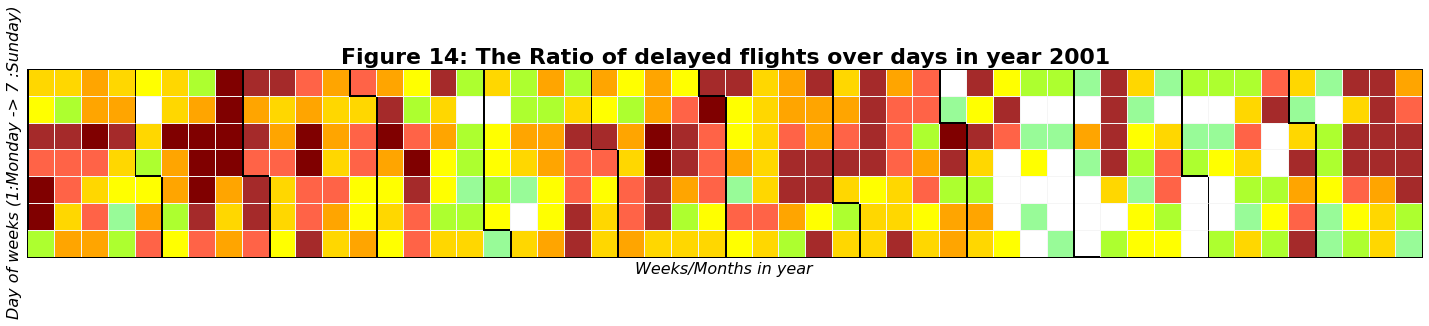

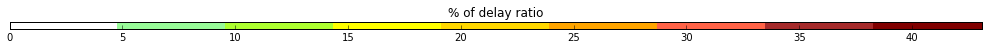

In [127]:
# Code ommited. We just rerun all the NB with the csv from 2001 and collected this image

## 6.2. Feature selection

You might think that the flight delays do not only depend on the source airport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

There are some other datasets that related to this use case:

- Airport IATA Codes to City names and Coordinates mapping: http://stat-computing.org/dataexpo/2009/airports.csv
- Carrier codes to Full name mapping: http://stat-computing.org/dataexpo/2009/carriers.csv
- Information about individual planes: http://stat-computing.org/dataexpo/2009/plane-data.csv
- Weather information: http://www.wunderground.com/weather/api/. You can subscribe for free to the developers' API and obtain (at a limited rate) historical weather information in many different formats. Also, to get an idea of the kind of information is available, you can use this link: http://www.wunderground.com/history/


### Question 13
<div class="alert alert-info">
Using the data sources above, select additional feature and repeat the process of defining an appropriate training and test datasets, to evaluate the impact of new features on the performance of the model. Focus first on decision trees, then move to random forests.
</div>

In [64]:
# Trying new features!
def is_holiday(day, month):
    if month == 12 and day >= 20 or month == 1 and day <= 10: return 1  #Christmas holiday
    if month >= 5 and day > 20 and month <= 8 and day <= 10: return 1  #Summer holiday
    return 0
def is_winter(day, month):
    if month == 12 and day >= 15 or month <= 2 and day <= 17: return 1
    return 0

In [98]:
airportTrafficPD = pd.DataFrame(stat_airport_traffic.collect(), columns=['airport', 'n_flights'])
mean_n_flights = airportTrafficPD.n_flights.mean()
map_nflights_to_airport = dict(zip(airportTrafficPD.airport, airportTrafficPD.n_flights))

In [94]:
# Recreate the data with the new features
data_extended = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                                      
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                    else map_src_airport_to_index[src_airports[0]], # src_airport
                                                  
                map_dest_airports_to_index[values[17]] if is_valid(values[17]) \
                    else map_dest_airports_to_index[dest_airports[0]], # destination_airport
                                      
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                
                #--------------------------- NEW FEATURES ----------------------------
                is_holiday(int(values[2]), int(values[1])), # is holiday
                
                is_winter(int(values[2]), int(values[1])), # is winter
                
                int(map_nflights_to_airport[values[16]]) if values[16] in map_nflights_to_airport\
                    else int(mean_n_flights),
                #---------------------------------------------------------------------
                
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData_ext, testData_ext) = data_extended.randomSplit([0.7, 0.3])

trainingData_ext = trainingData_ext.cache()
testData_ext = testData_ext.cache()

In [95]:
trainingData_ext.take(10)

[LabeledPoint(-9.0, [1994.0,1.0,7.0,5.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,1.0,1.0,259712.0]),
 LabeledPoint(20.0, [1994.0,1.0,10.0,1.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,1.0,1.0,259712.0]),
 LabeledPoint(88.0, [1994.0,1.0,11.0,2.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,0.0,1.0,259712.0]),
 LabeledPoint(21.0, [1994.0,1.0,12.0,3.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,0.0,1.0,259712.0]),
 LabeledPoint(2.0, [1994.0,1.0,14.0,5.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,0.0,1.0,259712.0]),
 LabeledPoint(1.0, [1994.0,1.0,15.0,6.0,900.0,1003.0,1.0,9.0,55.0,290.0,1.0,0.0,1.0,259712.0]),
 LabeledPoint(-4.0, [1994.0,1.0,18.0,2.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,0.0,0.0,259712.0]),
 LabeledPoint(-16.0, [1994.0,1.0,19.0,3.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,0.0,0.0,259712.0]),
 LabeledPoint(5.662489742613603, [1994.0,1.0,21.0,5.0,900.0,1003.0,1.0,9.0,55.0,290.0,0.0,0.0,0.0,259712.0]),
 LabeledPoint(-2.0, [1994.0,1.0,22.0,6.0,900.0,1003.0,1.0,9.0,55.0,290.0,1.0,0.0,0.0,259712.0])]

In [96]:
# Model with added implicit features
model_extended = DecisionTree.trainRegressor(trainingData_ext, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)
print('Model Number of Nodes: ', model_extended.numNodes())
print('Model Depth: ', model_extended.depth())

Model Number of Nodes:  8073
Model Depth:  12


In [97]:
# Evaluate model on test instances and compute test error 
predictions_ext = model_extended.predict(testData_ext.map(lambda x: x.features))
labelsAndPredictions_ext = testData_ext.map(lambda lp: lp.label).zip(predictions_ext)

testMSE_ext = labelsAndPredictions_ext.map(
    lambda p: np.power(p[0] - p[1], 2)).mean()
print('Test Mean Squared Error = ' + str(testMSE_ext))
print('Test RMSE = ' + str(np.sqrt(testMSE_ext)))

Test Mean Squared Error = 488.193096493
Test RMSE = 22.0950921359


<div class='alert alert-warning'>
<b>COMMENT</b><br/>
We tried with 3 different new features, all of them implicit: isHoliday (during christmass or summer), isWinter(from 15th Dec to mid february) and airport flight volume. <br/>
We won only a marginal accuracy when including the Extended version, but it seems like including the number of Flights per airport does indeed increase the accuracy, although it doesn't affect substantially (-3 to MSE in oroginal data).
<table class = 'table table-responsive'>
<thead><tr>
    <th>Model</th><th>Nº Nodes</th><th>Test MSE</th><th>Test RMSE</th>
</tr></thead>
<tbody>
    <tr><td>Original</td><td>8045</td><td>491.455598284</td><td>22.1687978538</td></tr>
    <tr><td>Extended (Original + isWinter + isHoliday)</td><td>8067</td><td>491.15063135</td><td>22.1619184943</td></tr>
    <tr><td>Extended2 (Extended + airport_nFlights)</td><td>8073</td><td>488.193096493</td><td>22.0950921359</td></tr>
</tbody>
</table>
Some further features that we wuld like to investigate are:
<ul>
<li>Local weather both on source and destination airports.</li>
<li>Number of flights from source and destination airports on that day.</li>
<li>Delays on planes arriving on that same airport on that same day</li>
</ul>
</div>

# Summary
> The important thing is to not stop questioning.

Curiosity has its own reason for existence. (Albert Einstein)
In this nNotebook, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.

# References

Flight delays project: http://ddowey.github.io/cs109-Final-Project/FlightDelay-ProjectFinal.html